In [1]:
import sys
sys.path.append("/scratch/group/csce435-f24/python-3.10.4/lib/python3.10/site-packages")
sys.path.append("/scratch/group/csce435-f24/thicket")
from glob import glob

import matplotlib.pyplot as plt
import pandas as pd

import thicket as th

pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

In [5]:
# For each of comp_large, comm, and main:
# Strong scaling plots for each input_size with lines for input_type (7 plots - 4 lines each)
# x axis = num_procs
# y axis = total_time
# 4 lines, one for each input type
# Strong scaling speedup plot for each input_type (4 plots)
# Weak scaling plots for each input_type (4 plots)
 
def strong_plot_total_time(time_col, size, df):
    x_ticks = [2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]
    plt.figure(figsize=(15, 8))
    local_df = df[df["name"].isin(["comm", "comp"])]
    print(type(local_df))
    df_sum = local_df.groupby(['num_procs', 'input_size', 'input_type'], as_index=False).agg({time_col: 'sum'})

    # Filter by input size (assuming 'size' is defined globally or passed as an argument)
    df_sum = df_sum[df_sum['input_size'] == size]

    # Sort the values for better plotting
    df_sum = df_sum.sort_values(by=['input_size', 'num_procs'])

    for input_type, group in df_sum.groupby('input_type'):
        plt.plot(group['num_procs'], group[time_col], marker='o', label=f'Input Type {input_type}')

    # Add labels and title
    plt.xlabel('Number of Processors (num_procs)')
    plt.ylabel(time_col)
    plt.title(f'{time_col} vs Number of Processors, Grouped by Input Type(size={size}, Total Time)')
    plt.xticks(x_ticks)

    # Add a legend
    plt.legend(title='Input Size')

    # Display the plot
    plt.grid(True)
    plt.show()   
    

In [6]:
all_tk = th.Thicket.from_caliperreader(glob("cali/**/*.cali", recursive=True))

(2/2) Creating Thicket: 100%|██████████| 167/167 [00:06<00:00, 25.86it/s]


<class 'pandas.core.frame.DataFrame'>


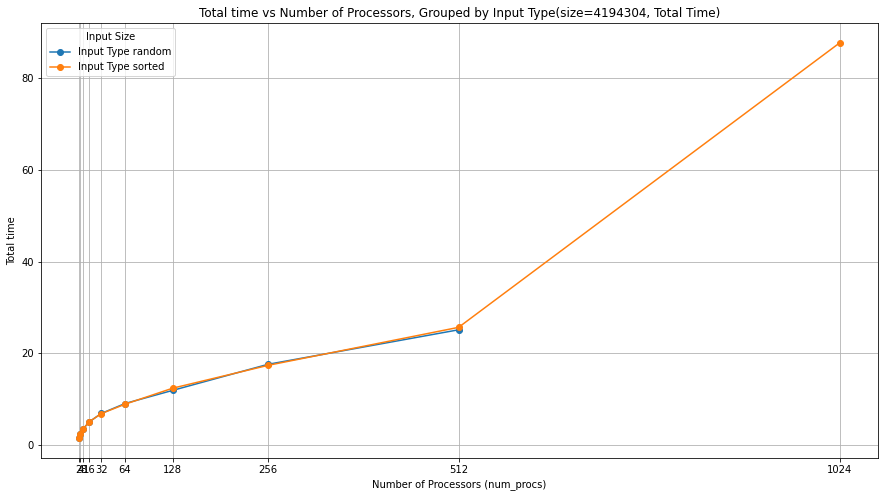

In [11]:
df = pd.merge(all_tk.dataframe, all_tk.metadata, on="profile")
strong_plot_total_time("Total time", 2**22, df)